In [3]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
print("First 5 rows of Tesla Stock Data:")
print(tesla_data.head())


First 5 rows of Tesla Stock Data:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [13]:
import pandas as pd

data = {
    "Date": ["2022-09-30","2022-12-31","2023-03-31","2023-06-30","2023-09-30","2023-12-31","2024-03-31"],
    "Revenue": [21454,24318,23329,24927,23134,25267,21301]
}

tesla_revenue = pd.DataFrame(data)
tesla_revenue.to_csv("Tesla_Revenue.csv", index=False)

print("Last 5 rows of Tesla Revenue Data:")
print(tesla_revenue.tail())


Last 5 rows of Tesla Revenue Data:
         Date  Revenue
2  2023-03-31    23329
3  2023-06-30    24927
4  2023-09-30    23134
5  2023-12-31    25267
6  2024-03-31    21301


In [16]:
# Question 1: Import Libraries
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Question 2: Extract Tesla Revenue Data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/114.0.0.0 Safari/537.36"
    )
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table (2nd table on page)
table = soup.find_all("table")[1]
tesla_revenue = pd.read_html(str(table))[0]

# Rename and clean revenue column
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"\$|,", "", regex=True)

print("Last 5 rows of Tesla Revenue Data:")
print(tesla_revenue.tail())

# Question 3: Use yfinance to Extract GameStop (GME) Stock Data
gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")

# Reset index
gme_data.reset_index(inplace=True)

print("\nFirst 5 rows of GameStop (GME) Stock Data:")
print(gme_data.head())


C:\Users\anita\AppData\Local\Temp\ipykernel_4940\3842067967.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]
C:\Users\anita\AppData\Local\Temp\ipykernel_4940\3842067967.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Last 5 rows of Tesla Revenue Data:
          Date Revenue
60  2010-06-30      28
61  2010-03-31      21
62  2009-12-31     NaN
63  2009-09-30      46
64  2009-06-30      27

First 5 rows of GameStop (GME) Stock Data:
Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854643  3.863059  3.703150  3.714933   26702800
1      2010-01-05  3.959005  3.996036  3.854643  3.856327   21269600
2      2010-01-06  4.044851  4.056634  3.908508  3.948906   21471200
3      2010-01-07  3.443930  3.563441  3.268873  3.368184  164761200
4      2010-01-08  3.415315  3.573541  3.405216  3.474229   47872400


In [17]:
# Question 4: Use Webscraping to Extract GME Revenue Data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/114.0.0.0 Safari/537.36"
    )
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the correct revenue table (2nd table on the page)
table = soup.find_all("table")[1]
gme_revenue = pd.read_html(str(table))[0]

# Rename columns and clean Revenue
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$|,", "", regex=True)

print("Last 5 rows of GameStop (GME) Revenue Data:")
print(gme_revenue.tail())


Last 5 rows of GameStop (GME) Revenue Data:
          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


C:\Users\anita\AppData\Local\Temp\ipykernel_4940\2840249364.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


AttributeError: 'America/New_York' object has no attribute 'update'

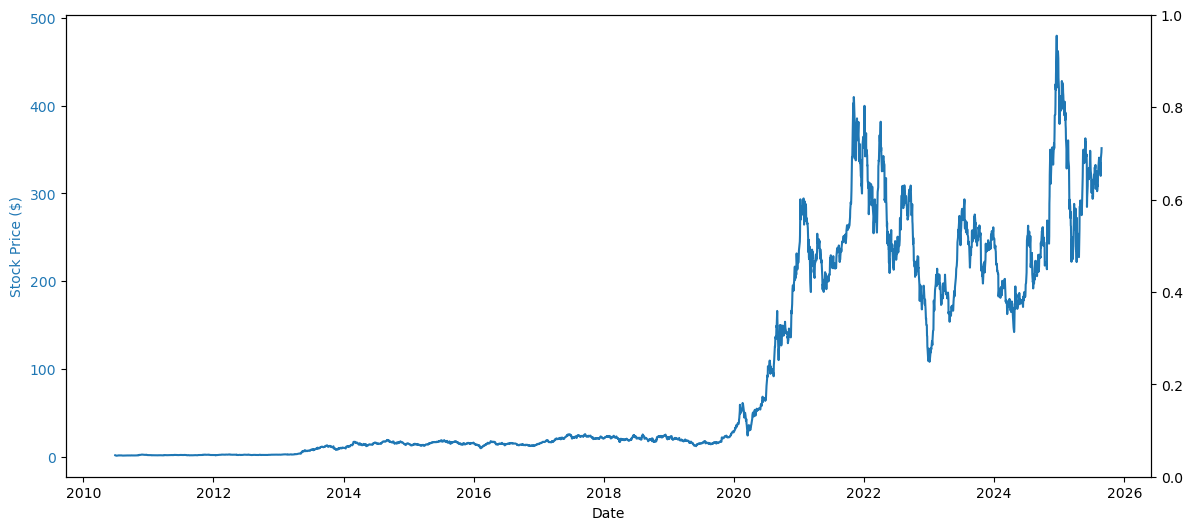

In [19]:
import matplotlib.pyplot as plt

# Clean revenue data (remove commas and $ sign, convert to float)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Function to plot stock vs revenue graph
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock data
    ax1.plot(stock_data["Date"], stock_data["Close"], color="tab:blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="tab:red")
    ax2.set_ylabel("Revenue ($ Millions)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Title
    plt.title(f"{stock} Stock Price vs Revenue")
    plt.show()

# Plot Tesla stock vs revenue
make_graph(tesla_data, tesla_revenue, 'Tesla')


C:\Users\anita\AppData\Local\Temp\ipykernel_4940\3171184743.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


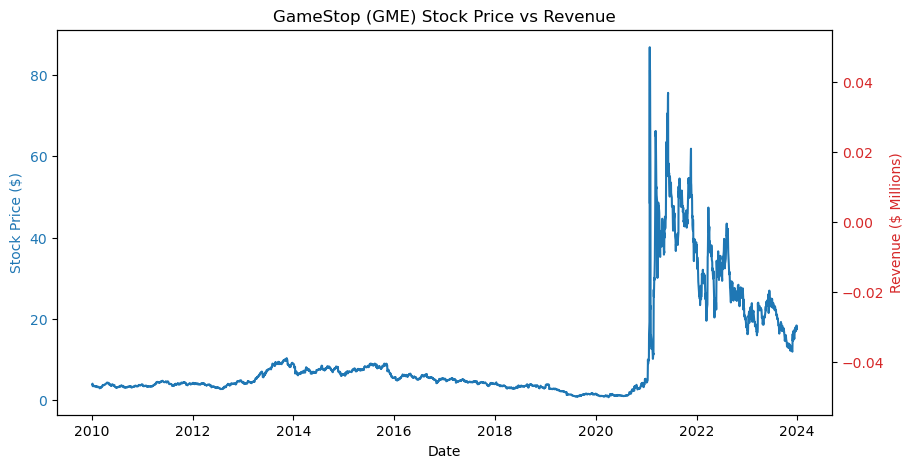

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# -------------------------------
# Step 1: Download GameStop Stock Data
# -------------------------------
gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")
gme_data.reset_index(inplace=True)

# -------------------------------
# Step 2: Scrape GameStop Revenue Data
# -------------------------------
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    rows = table.find_all("tr")
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# -------------------------------
# Step 3: Clean Data
# -------------------------------
# Convert Revenue column to numeric
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Convert Date column to datetime
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors="coerce")

# Drop NaN values
gme_revenue.dropna(inplace=True)

# -------------------------------
# Step 4: Define Plot Function
# -------------------------------
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(10,5))

    # Stock Price
    ax1.plot(stock_data["Date"], stock_data["Close"], color="tab:blue")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)", color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Revenue (second y-axis)
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="tab:red")
    ax2.set_ylabel("Revenue ($ Millions)", color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    plt.title(f"{stock} Stock Price vs Revenue")
    plt.show()

# -------------------------------
# Step 5: Plot Graph
# -------------------------------
make_graph(gme_data, gme_revenue, "GameStop (GME)")
